In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_theme(style="ticks")

In [24]:
path_to_data = "/Volumes/RD_Coscia/Jose/P26_BCCN/P26E10_nuclear_smk/quantification/1002_m150_s2_backsub_quantification.csv"
df = pd.read_csv(path_to_data)
df = df.sample(frac=0.1, random_state=0).reset_index(drop=True)

In [25]:
df.shape

(47660, 85)

In [26]:
df.columns

Index(['CellID', 'std_750_bg', 'std_647_bg', 'std_555_bg', 'std_488_bg',
       'std_DAPI_bg', 'std_Vimentin', 'std_CD3e', 'std_panCK', 'std_CD8',
       'std_DAPI_1', 'std_COL1A1', 'std_CD20', 'std_CD68', 'std_Ki67',
       'std_DAPI_2', 'mean_750_bg', 'mean_647_bg', 'mean_555_bg',
       'mean_488_bg', 'mean_DAPI_bg', 'mean_Vimentin', 'mean_CD3e',
       'mean_panCK', 'mean_CD8', 'mean_DAPI_1', 'mean_COL1A1', 'mean_CD20',
       'mean_CD68', 'mean_Ki67', 'mean_DAPI_2', 'quantile25_750_bg',
       'quantile25_647_bg', 'quantile25_555_bg', 'quantile25_488_bg',
       'quantile25_DAPI_bg', 'quantile25_Vimentin', 'quantile25_CD3e',
       'quantile25_panCK', 'quantile25_CD8', 'quantile25_DAPI_1',
       'quantile25_COL1A1', 'quantile25_CD20', 'quantile25_CD68',
       'quantile25_Ki67', 'quantile25_DAPI_2', 'quantile50_750_bg',
       'quantile50_647_bg', 'quantile50_555_bg', 'quantile50_488_bg',
       'quantile50_DAPI_bg', 'quantile50_Vimentin', 'quantile50_CD3e',
       'quantile50_pa

<Axes: xlabel='X_centroid', ylabel='Y_centroid'>

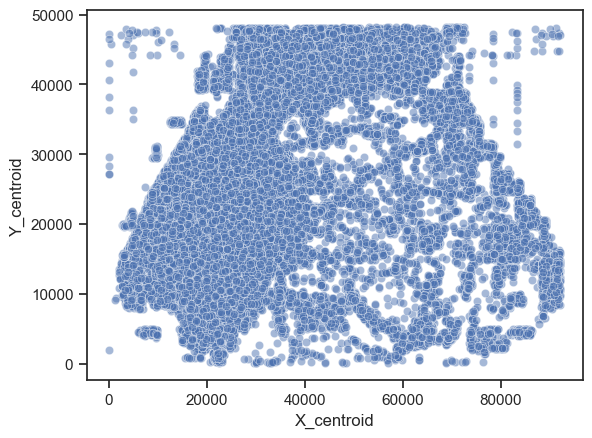

In [28]:
sns.scatterplot(data=df, x="X_centroid", y="Y_centroid", alpha=0.5)

<Axes: ylabel='Frequency'>

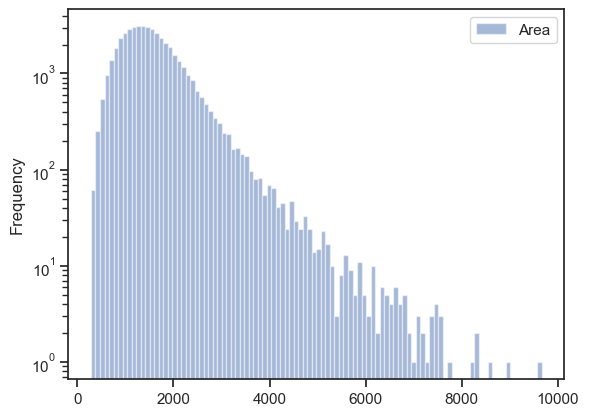

In [29]:
df.plot.hist(y='Area', bins=100, alpha=0.5, log=True)

## Delete too small or too large segmentation masks

In [30]:
# label all rows for which the value is less than 1%
df['Area_bot001'] = df['Area'] < df['Area'].quantile(0.01)
df['Area_top001'] = df['Area'] > df['Area'].quantile(0.99)

print(f"Number of rows with Area < 1%: {df['Area_bot001'].sum()} with area less than {df['Area'].quantile(0.01)}")
print(f"Number of rows with Area > 1%: {df['Area_top001'].sum()} with area more than {df['Area'].quantile(0.99)}")

Number of rows with Area < 1%: 477 with area less than 506.59000000000003
Number of rows with Area > 1%: 477 with area more than 4116.409999999996


In [32]:
# calculate DAPI ratio between cells
df['dapi_ratio_log'] = np.log10(df['mean_DAPI_bg']/df['mean_DAPI_2'])
df['dapi_ratio'] = df['mean_DAPI_bg']/df['mean_DAPI_2']

/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:775: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


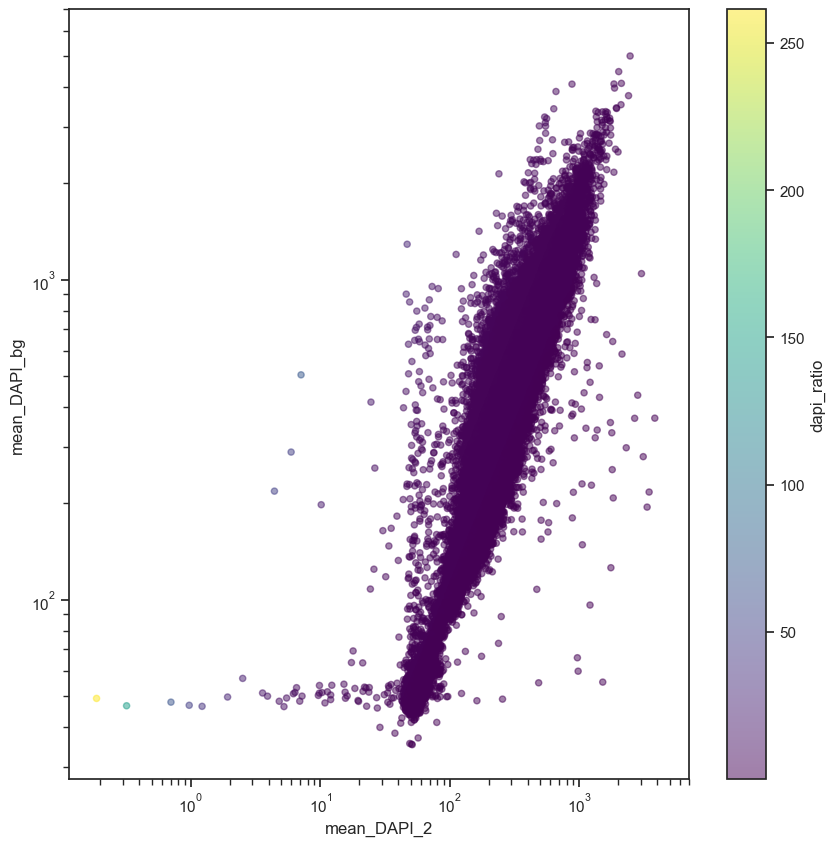

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))
df.plot.scatter(x='mean_DAPI_2', y='mean_DAPI_bg', c='dapi_ratio', colormap='viridis', alpha=0.5, ax=ax, ylim=(-100, 7000), xlim=(-100, 7000), logx=True, logy=True)
plt.show()

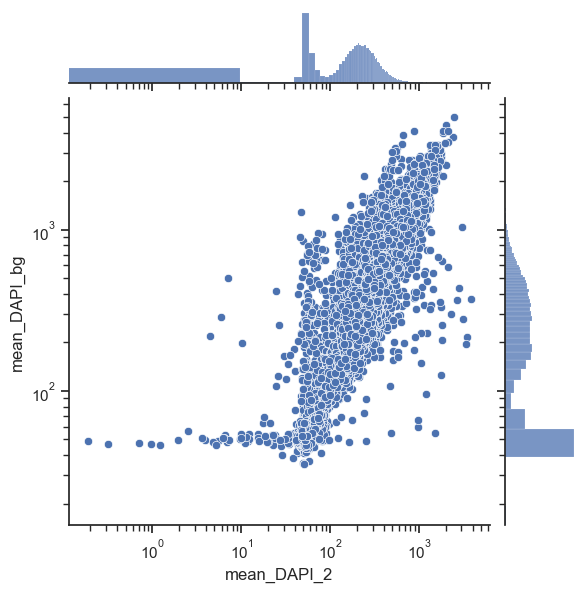

In [34]:
sns.jointplot(x=df['mean_DAPI_2'], y=df['mean_DAPI_bg'], kind="scatter")
plt.xscale('log')
plt.yscale('log')

In [35]:
# I will filter out cells that for the last cycle don't have enough DAPI signal to be considered a cell
df['DAPI_drop'] = df['mean_DAPI_2'] < 80

<Axes: xlabel='X_centroid', ylabel='Y_centroid'>

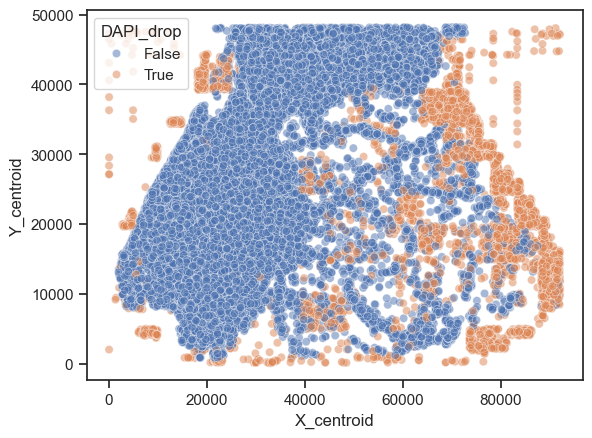

In [36]:
sns.scatterplot(data=df, x="X_centroid", y="Y_centroid", alpha=0.5, hue='DAPI_drop')

/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:775: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


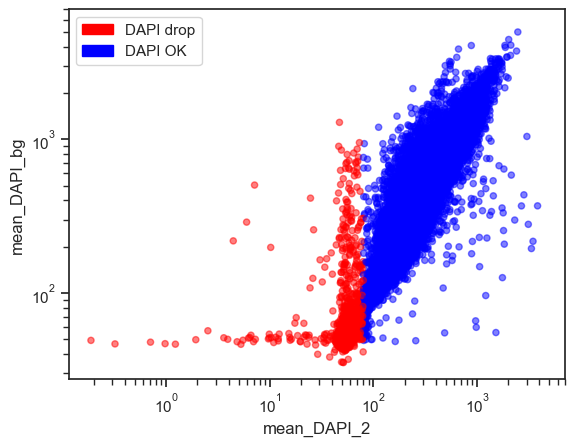

In [10]:
df.plot.scatter(x='mean_DAPI_2', y='mean_DAPI_bg', c=df['DAPI_drop'].map({True: 'red', False: 'blue'}), alpha=0.5, ylim=(-100, 7000), xlim=(-100, 7000), logx=True, logy=True)
# add legend
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='DAPI drop')
blue_patch = mpatches.Patch(color='blue', label='DAPI OK')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:772: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(self.ylim)
/opt/homebrew/Caskroom/mambaforge/base/envs/sopa/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:775: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(self.xlim)


<Axes: xlabel='mean_DAPI_2', ylabel='mean_DAPI_bg'>

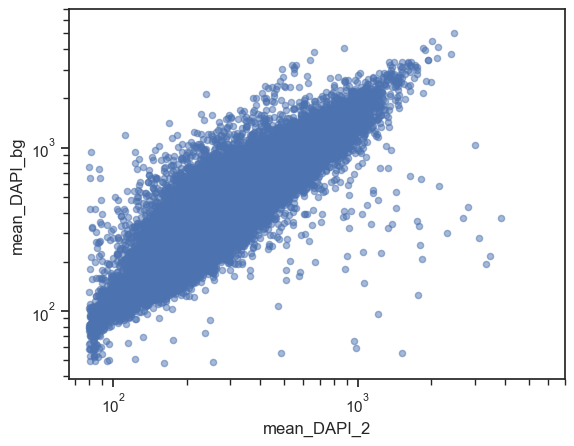

In [11]:
df_tmp = df[df['DAPI_drop'] == False]
df_tmp.plot.scatter(x='mean_DAPI_2', y='mean_DAPI_bg', alpha=0.5, ylim=(-100, 7000), xlim=(-100, 7000), logx=True, logy=True)

<Axes: ylabel='Frequency'>

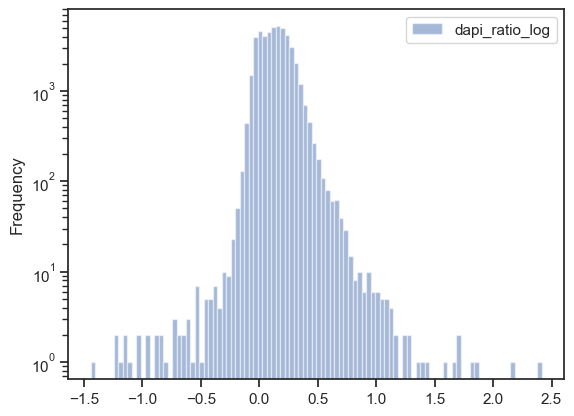

In [12]:
#viz dapi ratio
tmp_df = df.replace([np.inf, -np.inf], np.nan).dropna()
tmp_df.plot.hist(y='dapi_ratio_log', bins=100, alpha=0.5, log=True)

In [13]:
# the closer to 0 the more consistent the DAPI signal is
# what would my threshold be? For now I will use 0.5
df['dapi_ratio_log_bot'] = df['dapi_ratio_log'] < -0.5
df['dapi_ratio_log_top'] = df['dapi_ratio_log'] > 0.5

In [14]:
# new df with all numerical columns scaled to 0-1
df_scaled = df.copy()
df_scaled = df[['quantile50_DAPI_bg', 'quantile50_Vimentin', 'quantile50_CD3e',
       'quantile50_panCK', 'quantile50_CD8', 'quantile50_DAPI_1',
       'quantile50_COL1A1', 'quantile50_CD20', 'quantile50_CD68',
       'quantile50_Ki67', 'quantile50_DAPI_2']]
#scaling per column
df_scaled = (df_scaled - df_scaled.min()) / (df_scaled.max() - df_scaled.min())


<Axes: ylabel='Frequency'>

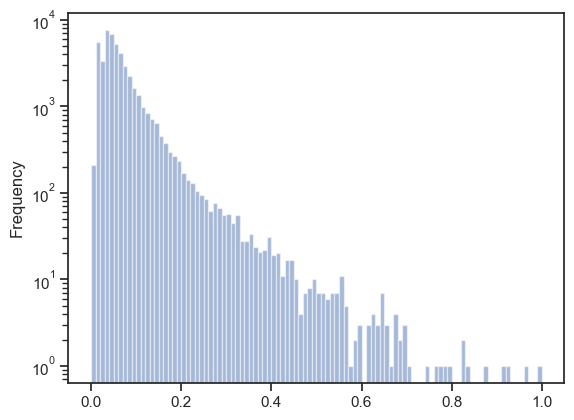

In [15]:
df_scaled['quantile50_DAPI_bg'].plot.hist(bins=100, alpha=0.5, log=True)

In [16]:
# sum all columns to get a score for each cell
df_scaled['score'] = df_scaled.sum(axis=1)

In [17]:
df_scaled.columns

Index(['quantile50_DAPI_bg', 'quantile50_Vimentin', 'quantile50_CD3e',
       'quantile50_panCK', 'quantile50_CD8', 'quantile50_DAPI_1',
       'quantile50_COL1A1', 'quantile50_CD20', 'quantile50_CD68',
       'quantile50_Ki67', 'quantile50_DAPI_2', 'score'],
      dtype='object')

<Axes: ylabel='Frequency'>

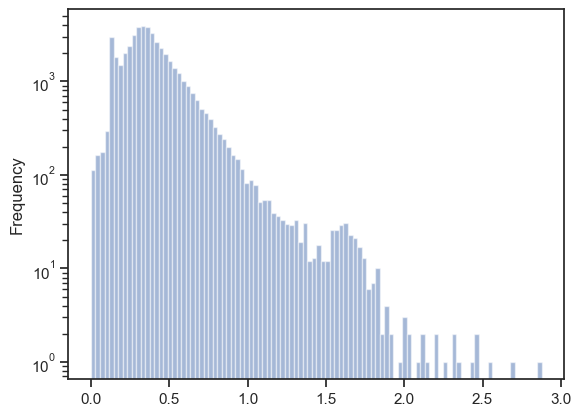

In [18]:
df_scaled['score'].plot.hist(bins=100, alpha=0.5, log=True)

<Axes: xlabel='quantile25_panCK', ylabel='mean_panCK'>

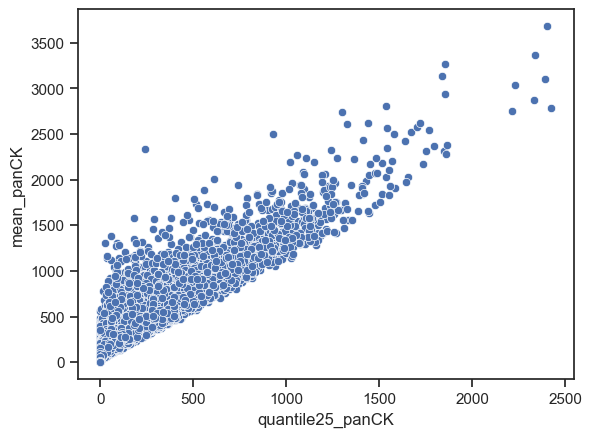

In [19]:
sns.scatterplot(x=df['quantile25_panCK'], y=df['mean_panCK'])

## Processed dataframe

In [40]:
#create dataframe where any row that is True for filtering columns is removed
df_filtered = df[~df['Area_bot001'] & ~df['Area_top001'] & ~df['DAPI_drop'] & ~df['dapi_ratio_log_bot'] & ~df['dapi_ratio_log_top']]

In [41]:
df_filtered.shape

(105764, 92)

In [22]:
df_filtered.plot.scatter(x='mean_panCK', y='mean_DAPI_bg', alpha=0.5, ylim=(-100, 7000), xlim=(-100, 7000), logx=True, logy=True)

NameError: name 'df_filtered' is not defined

In [21]:
df_filtered.columns

NameError: name 'df_filtered' is not defined

In [ ]:
#plot xy scatter 
sns.scatterplot(x=df_filtered['mean_panCK'], y=df_filtered['mean_DAPI_bg'], hue=df_filtered['score'])

In [45]:
# save processed df
df_filtered.to_csv("../data/quantification/1002_quantification_filtered.csv", index=False)

In [49]:
#save as parquet
df_filtered.to_parquet("../data/quantification/1002_quantification_filtered.parquet", index=False)